# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
!sudo apt-get install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh # download ollama api
from IPython.display import clear_output

# Create a Python script to start the Ollama API server in a separate thread

import os
import threading
import subprocess
import requests
import json

def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pciutils is already the newest version (1:3.7.0-6).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
from IPython.display import clear_output
!ollama pull llama3.1:8b
!pip install -U lightrag[ollama]
clear_output()

In [ ]:
from lightrag.core.generator import Generator
from lightrag.core.component import Component
from lightrag.core.model_client import ModelClient
from lightrag.components.model_client import OllamaClient

import time


qa_template = r"""<SYS>
You are a helpful assistant.
</SYS>
User: {{input_str}}
You:"""

class SimpleQA(Component):
    def __init__(self, model_client: ModelClient, model_kwargs: dict):
        super().__init__()
        self.generator = Generator(
            model_client=model_client,
            model_kwargs=model_kwargs,
            template=qa_template,
        )

    def call(self, input: dict) -> str:
        return self.generator.call({"input_str": str(input)})

    async def acall(self, input: dict) -> str:
        return await self.generator.acall({"input_str": str(input)})

In [ ]:
from lightrag.components.model_client import OllamaClient
from IPython.display import Markdown, display
model = {
    "model_client": OllamaClient(),
    "model_kwargs": {"model": "llama3.1:8b"}
}
qa = SimpleQA(**model)
output=qa("what is happiness, answer in markdown format")
display(Markdown(f"**Answer:** {output.data}"))

**Answer:** **Happiness**
===============

Happiness is a complex and multi-faceted concept that can be difficult to define. However, here are some key aspects of happiness:

### **Definition**

* Happiness is a positive emotional state characterized by feelings of joy, contentment, and fulfillment.
* It is often described as a sense of well-being or satisfaction with one's life.

### **Causes of Happiness**

* **Positive relationships**: Strong connections with family and friends can contribute to overall happiness.
* **Good physical health**: Taking care of one's physical health can increase feelings of happiness and well-being.
* **Personal growth**: Engaging in activities that promote personal growth and development can lead to increased happiness.
* **Gratitude**: Practicing gratitude and appreciation for the good things in life can contribute to happiness.

### **Characteristics of Happiness**

* **Optimism**: A positive outlook on life, expecting good things to happen.
* **Contentment**: Feeling satisfied with one's life circumstances.
* **Flow**: Being fully engaged and immersed in activities that bring joy and fulfillment.
* **Resilience**: Ability to bounce back from adversity and challenges.

### **Types of Happiness**

* **Hedonic happiness**: Focuses on pleasure and enjoyment, often fleeting.
* **Eudaimonic happiness**: Focuses on living a meaningful and fulfilling life, often more lasting.
* **Mindfulness-based happiness**: Focuses on being present in the moment and appreciating what one has.

### **Tips for Increasing Happiness**

* Practice gratitude and positivity.
* Engage in activities that promote personal growth and development.
* Nurture positive relationships and connections.
* Take care of your physical health.
* Cultivate mindfulness and be present in the moment.

In [ ]:
!pip install umap
!pip install umap-learn

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=75774dc3e318e3eb23f14a39b526c378c92acd7a0e6b747284a8abbfec76f22c
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
import threading
import time
import os
import asyncio
from pyngrok import ngrok
import threading
import queue
import time
from threading import Thread

# Get your ngrok token from your ngrok account:
# https://dashboard.ngrok.com/get-started/your-authtoken
token="2pvTYC0VzByZLxsuyJQS25C0pf8_28X8sG1FD88duFBnaqNGd"
ngrok.set_auth_token(token)

# set up a stoppable thread (not mandatory, but cleaner if you want to stop this later
class StoppableThread(threading.Thread):
    def __init__(self, *args, **kwargs):
        super(StoppableThread, self).__init__(*args, **kwargs)
        self._stop_event = threading.Event()

    def stop(self):
        self._stop_event.set()

    def is_stopped(self):
        return self._stop_event.is_set()

def start_ngrok(q, stop_event):
    try:
        # Start an HTTP tunnel on the specified port
        public_url = ngrok.connect(11434)
        # Put the public URL in the queue
        q.put(public_url)
        # Keep the thread alive until stop event is set
        while not stop_event.is_set():
            time.sleep(1)  # Adjust sleep time as needed
    except Exception as e:
        print(f"Error in start_ngrok: {e}")

In [ ]:
# Create a queue to share data between threads
url_queue = queue.Queue()

# Start ngrok in a separate thread
ngrok_thread = StoppableThread(target=start_ngrok, args=(url_queue, StoppableThread.is_stopped))
ngrok_thread.start()

In [ ]:
# Wait for the ngrok tunnel to be established
while True:
    try:
        public_url = url_queue.get()
        if public_url:
            break
        print("Waiting for ngrok URL...")
        time.sleep(1)
    except Exception as e:
        print(f"Error in retrieving ngrok URL: {e}")

print("Ngrok tunnel established at:", public_url)

Ngrok tunnel established at: NgrokTunnel: "https://975d-34-125-231-136.ngrok-free.app" -> "http://localhost:11434"


In [ ]:
import os
import asyncio

# NB: You may need to set these depending and get cuda working depending which backend you are running.
# Set environment variable for NVIDIA library
# Set environment variables for CUDA
os.environ['PATH'] += ':/usr/local/cuda/bin'
# Set LD_LIBRARY_PATH to include both /usr/lib64-nvidia and CUDA lib directories
os.environ['LD_LIBRARY_PATH'] = '/usr/lib64-nvidia:/usr/local/cuda/lib64'

async def run_process(cmd):
    print('>>> starting', *cmd)
    process = await asyncio.create_subprocess_exec(
        *cmd,
        stdout=asyncio.subprocess.PIPE,
        stderr=asyncio.subprocess.PIPE
    )

    # define an async pipe function
    async def pipe(lines):
        async for line in lines:
            print(line.decode().strip())

        await asyncio.gather(
            pipe(process.stdout),
            pipe(process.stderr),
        )

    # call it
    await asyncio.gather(pipe(process.stdout), pipe(process.stderr))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/train/anger-ratings-0to1.train.txt',
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/train/sadness-ratings-0to1.train.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/train/fear-ratings-0to1.train.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/train/joy-ratings-0to1.train.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/dev/anger-ratings-0to1.dev.gold.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/dev/fear-ratings-0to1.dev.gold.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/dev/joy-ratings-0to1.dev.gold.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


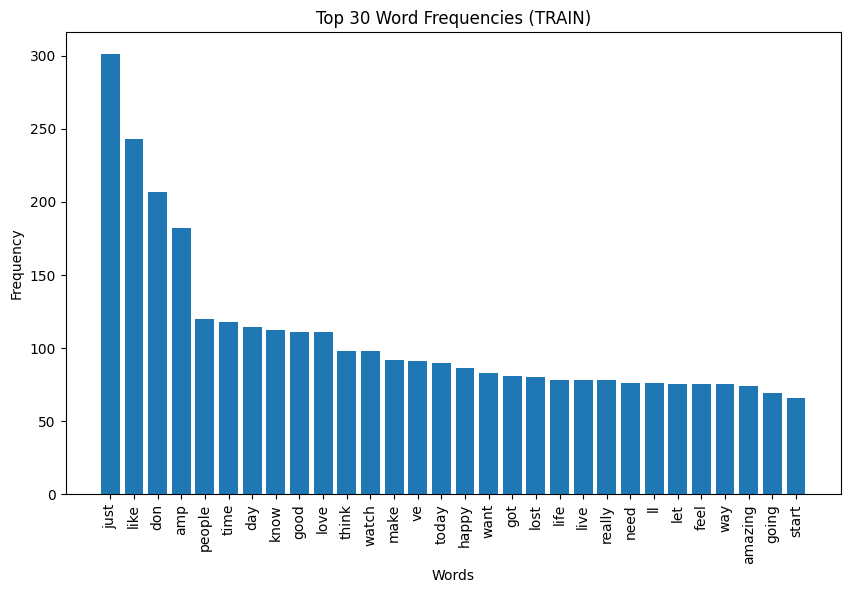

In [ ]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english', max_features=30)  # Top 30 words
X_counts = count_vect.fit_transform(train_df['text'])

# Create a DataFrame of word frequencies
word_freq = pd.DataFrame({'Word': count_vect.get_feature_names_out(), 'Frequency': X_counts.toarray().sum(axis=0)})
word_freq = word_freq.sort_values(by='Frequency', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(word_freq['Word'], word_freq['Frequency'])
plt.xticks(rotation=90)
plt.title("Top 30 Word Frequencies (TRAIN)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


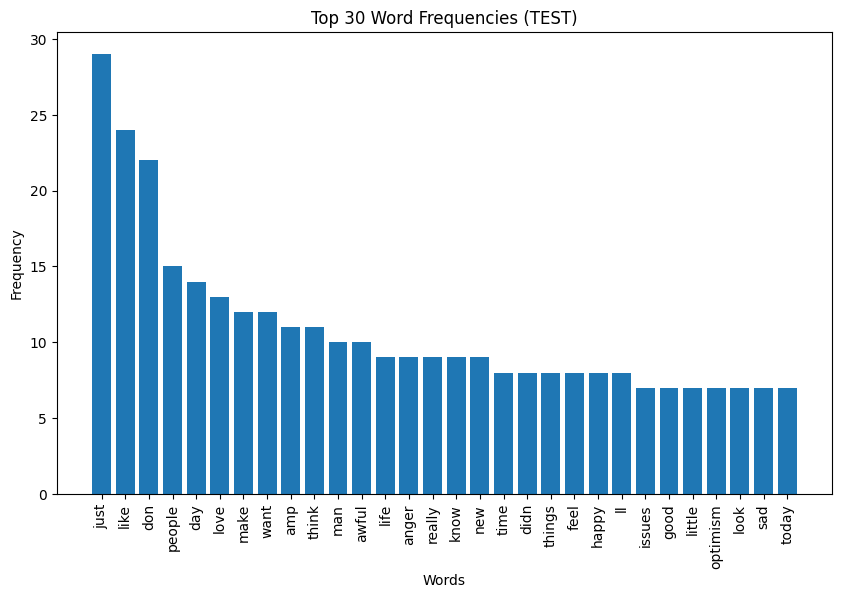

In [ ]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english', max_features=30)  # Top 30 words
X_counts = count_vect.fit_transform(test_df['text'])

# Create a DataFrame of word frequencies
word_freq = pd.DataFrame({'Word': count_vect.get_feature_names_out(), 'Frequency': X_counts.toarray().sum(axis=0)})
word_freq = word_freq.sort_values(by='Frequency', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(word_freq['Word'], word_freq['Frequency'])
plt.xticks(rotation=90)
plt.title("Top 30 Word Frequencies (TEST)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


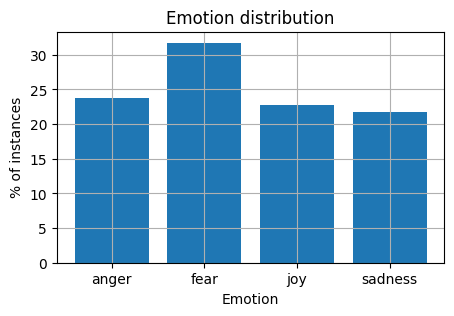

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [ ]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [ ]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


(3613, 500)

In [ ]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [ ]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer with a limit of 1000 features
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=1000)

# Assuming 'text_column' is the name of the column with the text data
X_tfidf = tfidf_vect.fit_transform(train_df['text'])  # Replace 'text_column' with your actual column name

# Display the feature names for indices 100 to 110
feature_names = tfidf_vect.get_feature_names_out()
print("Feature Names for indices 100 to 110:", feature_names[100:110])


Feature Names for indices 100 to 110: ['boiling' 'book' 'boss' 'boy' 'brad' 'break' 'breakfast' 'breezy'
 'bright' 'bring']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'joy', 'fear', 'fear', 'joy', 'anger', 'joy',
       'joy', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

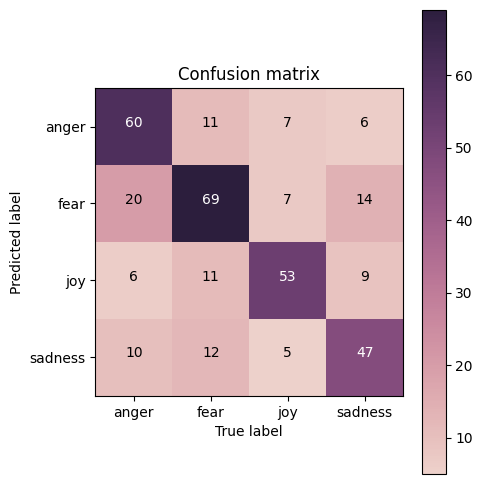

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
# The classifier is doing well enough, with the majority having a high accuracy as can be seen from the darker colors correctly corresponding to the predicted and true label
# Fear has a lot of misclassifications, getting categorized as sadness or anger, which is understandable given that they are also negative emotions
# But this can be seen as a point of improvement for our model
# The model seems to have the most difficulty differentiating between anger and fear


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Naive Bayes model using the training data
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred_nb = NB_model.predict(X_train)
y_test_pred_nb = NB_model.predict(X_test)

# Calculate accuracy
acc_train_nb = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
acc_test_nb = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)

# Print the accuracy results
print('Naive Bayes training accuracy: {}'.format(round(acc_train_nb, 2)))
print('Naive Bayes testing accuracy: {}'.format(round(acc_test_nb, 2)))

# Print classification report for the testing data
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_true=y_test, y_pred=y_test_pred_nb))



Naive Bayes training accuracy: 0.79
Naive Bayes testing accuracy: 0.71

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.74      0.81      0.77       110
         joy       0.77      0.70      0.73        79
     sadness       0.66      0.62      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



Confusion Matrix (Naive Bayes):
[[56 14  5  9]
 [ 7 89  5  9]
 [11  7 55  6]
 [12 10  6 46]]


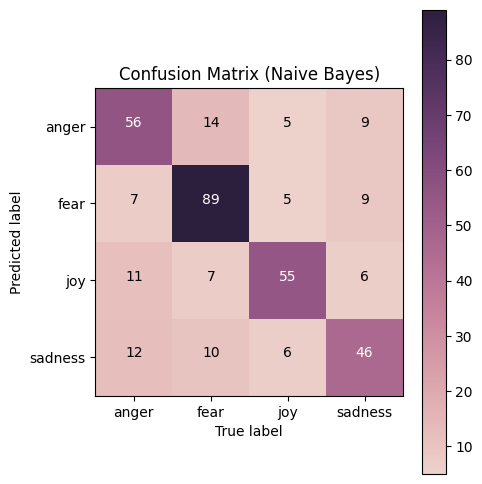

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Naive Bayes model
cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb)

# Print the confusion matrix
print("Confusion Matrix (Naive Bayes):")
print(cm_nb)

# Visualize the confusion matrix using the provided plot function
plot_confusion_matrix(cm_nb, classes=list(np.unique(y_test)), title='Confusion Matrix (Naive Bayes)')


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# decision tree model has a very high training accuracy of 0.99, indicating potential overfitting, whereas the nb model has a training accuracy of 0.79, which is more realistic and indicates less overfitting.
# nb shows a slight improvement in unseen data (testing)
# decision tree shows higher confusion across classes, especially with fear being misclassified as anger or joy. But with nb, misclassifications are more evenly distributed, and the model shows better recognition of joy
# For this dataset, nb seems to perform better overall due to its higher testing accuracy, more balanced precision/recall, and less overfitting compared to the decision tree



---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](attachment:pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
import keras

In [ ]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3394    sadness
3298    sadness
1582       fear
1196       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](attachment:pic2.png)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 59s 505ms/step - accuracy: 0.3210 - loss: 1.3581 - val_accuracy: 0.3833 - val_loss: 1.2943
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 216ms/step - accuracy: 0.6128 - loss: 1.0904 - val_accuracy: 0.6542 - val_loss: 0.9072
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - accuracy: 0.8163 - loss: 0.5737 - val_accuracy: 0.7118 - val_loss: 0.7773
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.8657 - loss: 0.3931 - val_accuracy: 0.7147 - val_loss: 0.7819
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8972 - loss: 0.3040 - val_accuracy: 0.7003 - val_loss: 0.8238
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9167 - loss: 0.2344 - val_accuracy: 0.6859 - val_loss: 0.8633
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9326 - loss: 0.2050 - val_accuracy: 0.6974 - val_loss: 0.9038
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9459 - loss: 0.1699 - va

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step


array([[9.5756584e-01, 6.3341530e-03, 2.2458082e-02, 1.3641941e-02],
       [9.9950957e-01, 1.9918284e-06, 1.8988794e-07, 4.8820893e-04],
       [8.5077435e-02, 2.7321440e-01, 5.7090443e-01, 7.0803732e-02],
       [4.6434063e-03, 1.5656388e-01, 5.1016985e-05, 8.3874172e-01],
       [1.6940269e-01, 1.2414341e-01, 3.4612647e-05, 7.0641929e-01]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'joy', 'sadness', 'sadness'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/logs/training_log_2.csv')
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.373097,1.328783,0.383285,1.294256
1,1,0.661500,0.974259,0.654179,0.907150
2,2,0.804041,0.565518,0.711816,0.777309
3,3,0.854691,0.404129,0.714697,0.781866
4,4,0.888458,0.315779,0.700288,0.823807
5,5,0.908940,0.255228,0.685879,0.863279
6,6,0.929698,0.213846,0.697406,0.903849
7,7,0.943814,0.178825,0.677233,1.015188
8,8,0.954885,0.153690,0.682997,1.015567
9,9,0.958206,0.134431,0.685879,1.077516


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](attachment:pic3.png)


![pic4.png](attachment:pic4.png)

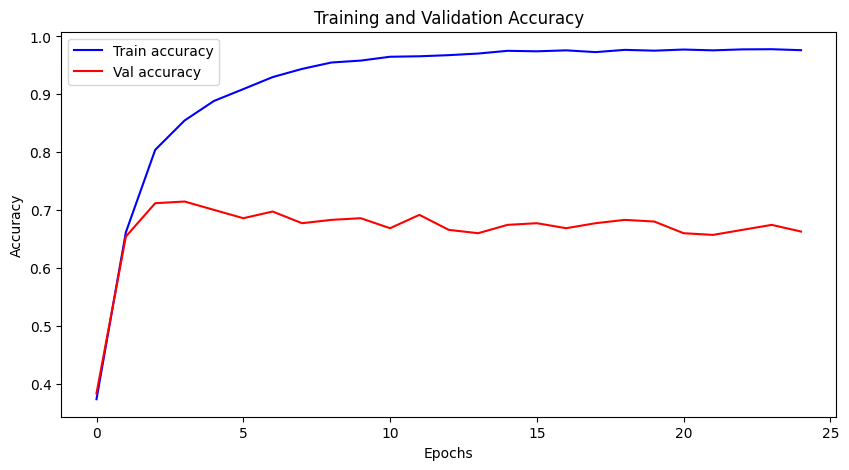

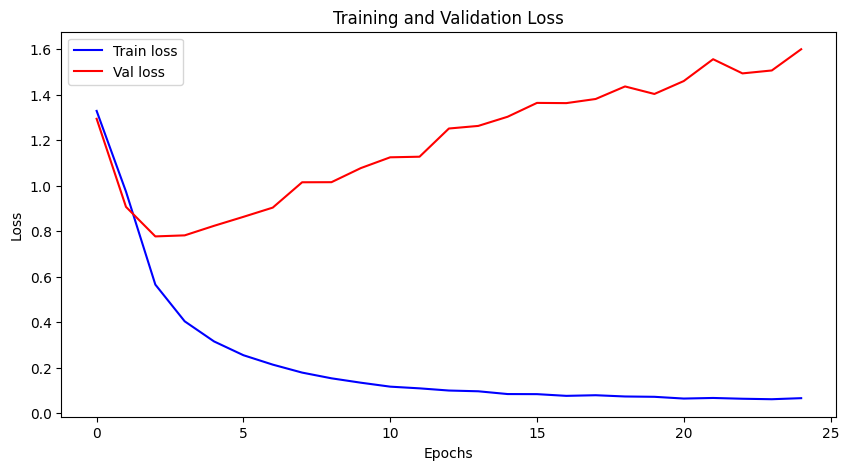

In [ ]:
# Answer here
import matplotlib.pyplot as plt
import pandas as pd

# Load the training log CSV
training_log = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/logs/training_log_2.csv')

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_log['epoch'], training_log['loss'], label='Train loss', color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


#The behavior seen in these graphs is a clear sign of overfitting.
#The model has learned to perform extremely well on the training data (high training accuracy, low training loss)
#but is not able to generalize to the validation set (low validation accuracy, increasing validation loss).
#This means the model has memorized the training data but has not learned general patterns that can be applied to new, unseen data.
#Underfitting would be indicated by both training and validation accuracies being low and/or losses being high,
#suggesting that the model is too simple to capture the underlying structure of the data.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3394,40567,"From what I know of the man, I have to assume ...","[From, what, I, know, of, the, man, ,, I, have..."
3298,40471,LORD MAKE ME AN INSTRUMENT OF YOUR PEACE — Whe...,"[LORD, MAKE, ME, AN, INSTRUMENT, OF, YOUR, PEA..."
1582,20725,"@mdthib This is so lovely! Or I am frightened,...","[@, mdthib, This, is, so, lovely, !, Or, I, am..."
1196,20339,How am I supposed to intimidate the freshman i...,"[How, am, I, supposed, to, intimidate, the, fr..."
2713,30709,@ryanwilson2015 That's why compatibility is ke...,"[@, ryanwilson2015, That, 's, why, compatibili..."


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['From', 'what', 'I', 'know', 'of', 'the', 'man', ',', 'I', 'have', 'to', 'assume', 'that', '@', 'realDonaldTrump', 'has', 'had', 'a', 'heated', 'argument', 'with', 'his', 'own', 'penis', '.']),
       list(['LORD', 'MAKE', 'ME', 'AN', 'INSTRUMENT', 'OF', 'YOUR', 'PEACE', '—', 'Where', 'there', "'s", 'hate', ',', 'let', 'me', 'sow', 'love', '—', 'Where', 'there', "'s", 'injury', ',', 'pardon', '—', 'Where', 'there', "'s", 'despair', ',', 'hope']),
       list(['@', 'mdthib', 'This', 'is', 'so', 'lovely', '!', 'Or', 'I', 'am', 'frightened', ',', 'not', 'sure', 'which', '!', 'But', ',', 'wow', '!'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

KeyboardInterrupt: 

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/GoogleNews-vectors-negative300.bin.gz'
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
##option 1/2 Average Word Embeddings = Compute the mean (average) of the word vectors for all words in a sentence.

import numpy as np

def average_word_vectors(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

train_df['sentence_vector'] = train_df['text_tokenized'].apply(lambda x: average_word_vectors(x, word2vec_model))



In [ ]:
## Option 2/2 TF-IDF Weighted Word Embeddings = TF-IDF score to give more importance to informative words ** my preference

from sklearn.feature_extraction.text import TfidfVectorizer

# Train TF-IDF on the corpus
tfidf = TfidfVectorizer()
tfidf.fit(train_df['text'])

# Create a dictionary mapping each word to its TF-IDF weight
tfidf_weights = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

def tfidf_weighted_word_vectors(sentence, model, tfidf_weights):
    vectors = [model.wv[word] * tfidf_weights.get(word, 0) for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

train_df['sentence_vector_tfidf'] = train_df['text_tokenized'].apply(lambda x: tfidf_weighted_word_vectors(x, word2vec_model, tfidf_weights))


## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 0
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](attachment:pic6.png)

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](attachment:pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:
![pic9-2.png](attachment:pic9-2.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

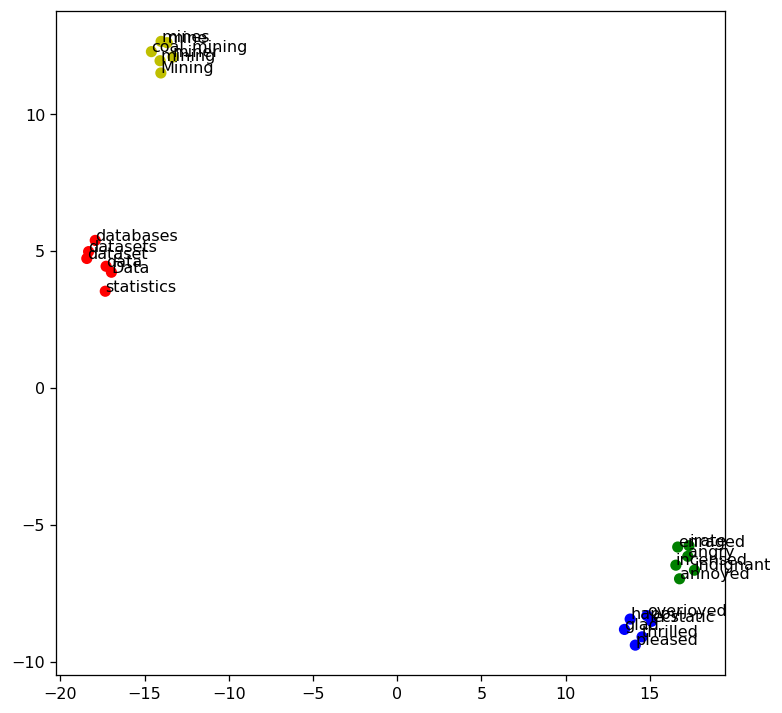

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

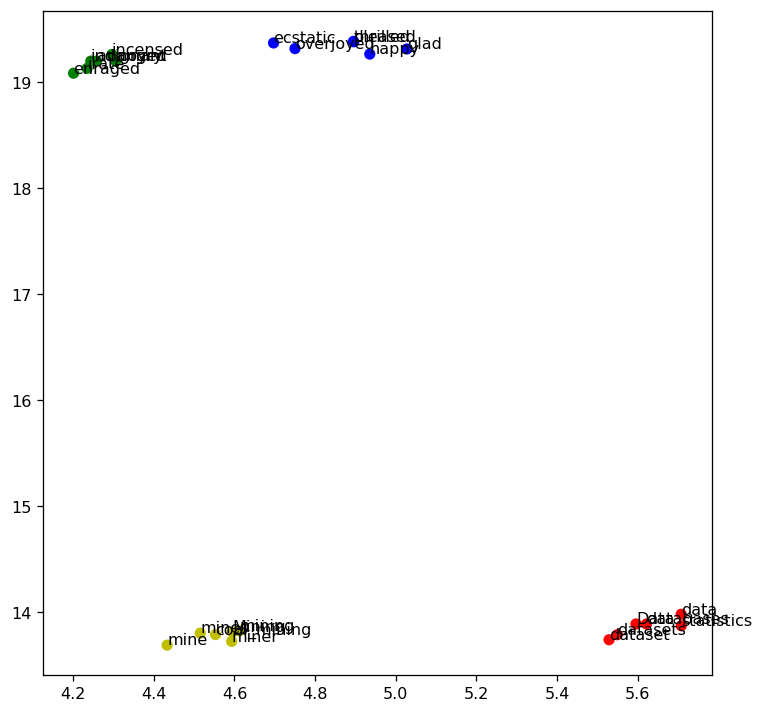

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

angry_words: ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words: ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words: ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words: ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

Target words:
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exaspe

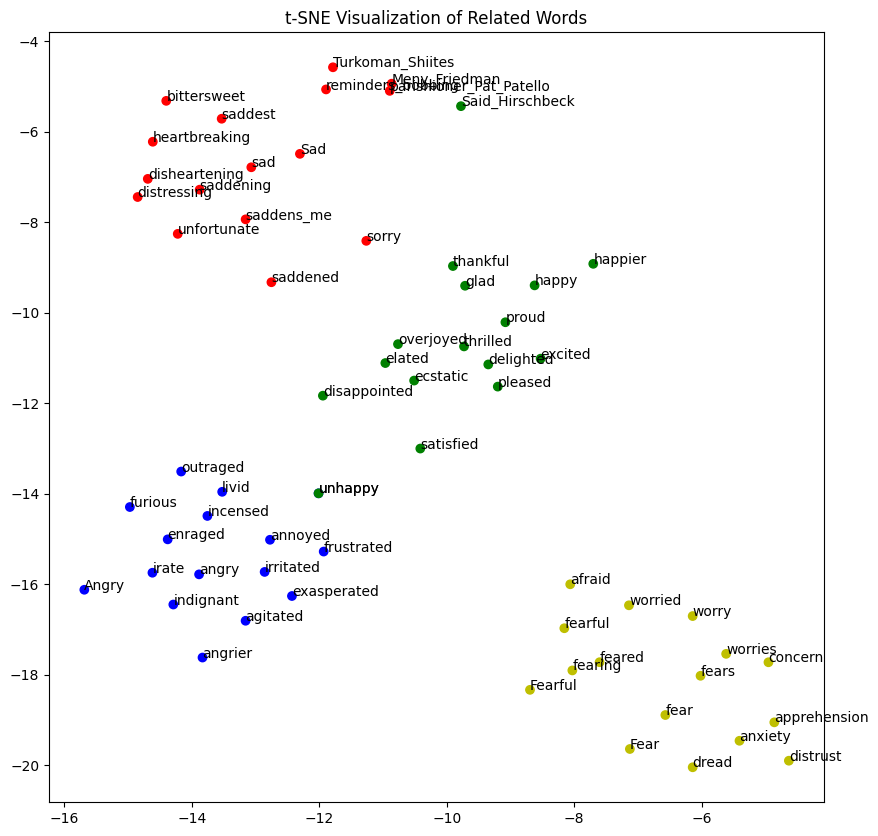

In [ ]:
# Define the main words
emotion_words = ['angry', 'happy', 'sad', 'fear']

# Generate the lists of 15 most similar words for each main word
topn = 15
emotion_word_lists = {word: [word] + [word_ for word_, sim_ in w2v_google_model.most_similar(word, topn=topn)]
                      for word in emotion_words}

# Print the lists for verification
for emotion, words in emotion_word_lists.items():
    print(f'{emotion}_words:', words)

# Combine all words into one target list
target_words = [word for words in emotion_word_lists.values() for word in words]

# Print combined target words
print('\nTarget words:')
print(target_words)

# Generate a color list for visualization
color = ['b'] * (topn + 1) + ['g'] * (topn + 1) + ['r'] * (topn + 1) + ['y'] * (topn + 1)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Prepare the word vectors for the target words
size = 200
target_size = len(target_words)
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

# Train t-SNE
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

# Plot t-SNE result
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("t-SNE Visualization of Related Words")
plt.show()



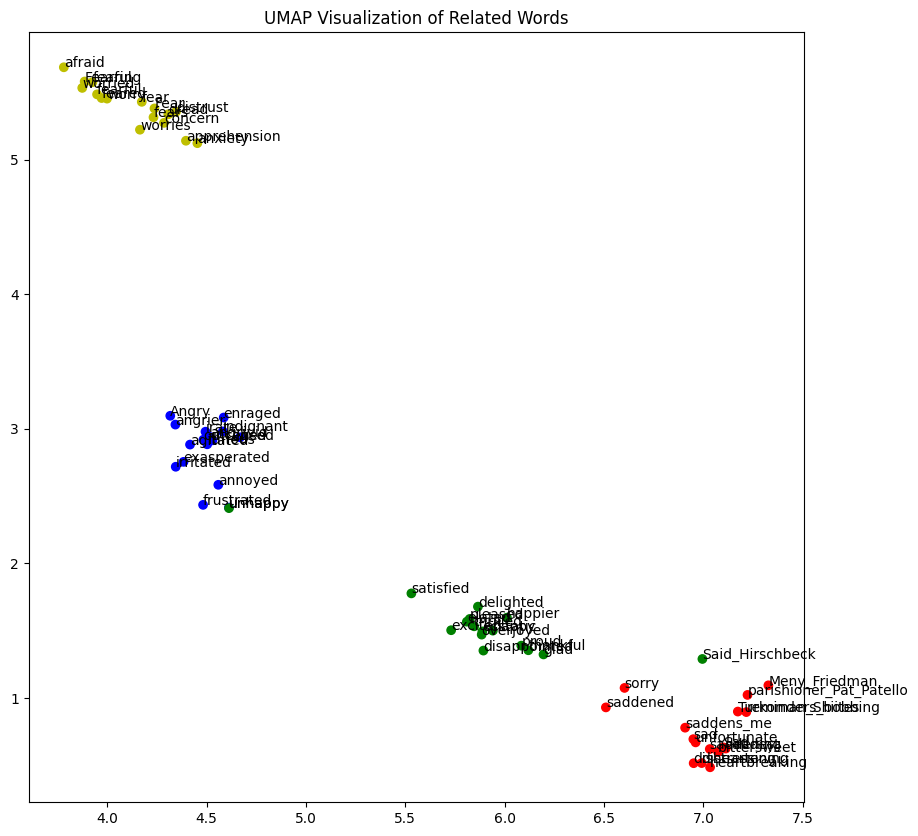

In [ ]:
import umap.umap_ as umap

# Train UMAP
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

# Plot UMAP result
plt.figure(figsize=(10, 10))
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("UMAP Visualization of Related Words")
plt.show()


# In terms of granularity, I feel like t-SNE excels in preserving local structures and fine details
# t-SNE making it easier to see small differences within clusters
# UMAP clusters are more distinct, but some words are getting mixed with other clusters due to semantic overlap,
# or possibly also due to UMAP's approach to preserving both local and global structures

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
![pic10.png](attachment:pic10.png)

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [ ]:
!ollama list

NAME            ID              SIZE      MODIFIED       
llama3.1:8b     46e0c10c039e    4.9 GB    13 minutes ago    
llava:latest    8dd30f6b0cb1    4.7 GB    43 minutes ago    


In [ ]:
model = {
    "model_client": OllamaClient(),
    "model_kwargs": {"model": "llama3.1:8b"}
}
qa = SimpleQA(**model)
output=qa("What is data mining? (in markdown format)")
print(output.data)


**Data Mining**

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques to extract relevant information from raw data, often with the goal of improving business performance or making informed decisions.

**Key Features of Data Mining**

* **Exploratory**: Data mining involves exploring large datasets to discover new patterns and relationships.
* **Automated**: The process is automated, allowing for quick and efficient analysis of complex data.
* **Non-intrusive**: Data mining does not require extensive manual data collection or programming.
* **Focused on prediction and decision-making**: The goal of data mining is often to make predictions or support business decisions.

**Types of Data Mining**

* **Classification**: Assigning labels or categories to new, unclassified data based on patterns learned from existing data.
* **Clustering**: Grouping similar data points into clusters based on s

In [ ]:
# response = ollama.chat(model='llama3.2', messages=[
#     {
#         'role': 'user',
#         'content': 'What is data mining? (in markdown format)'
#     },
# ])

# print(response['message']['content'])

**We can use the IPython library to make the response look better:**

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [ ]:
display(Markdown(f"**Answer:** {output.data}"))

**Answer:** **Data Mining**
===============

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques to extract relevant information from raw data, often with the goal of improving business performance or making informed decisions.

**Key Features of Data Mining**

* **Exploratory**: Data mining involves exploring large datasets to discover new patterns and relationships.
* **Automated**: The process is automated, allowing for quick and efficient analysis of complex data.
* **Non-intrusive**: Data mining does not require extensive manual data collection or programming.
* **Focused on prediction and decision-making**: The goal of data mining is often to make predictions or support business decisions.

**Types of Data Mining**

* **Classification**: Assigning labels or categories to new, unclassified data based on patterns learned from existing data.
* **Clustering**: Grouping similar data points into clusters based on shared characteristics.
* **Regression**: Predicting continuous values (e.g. stock prices) based on relationships learned from historical data.

**Applications of Data Mining**

* **Customer segmentation**
* **Market basket analysis**
* **Predictive maintenance**
* **Financial forecasting**
* **Medical diagnosis and treatment planning**

I hope this helps you understand the basics of data mining!


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [ ]:
# ollama.chat function uses the role parameter to define the context or purpose of a message within a conversation.
# For example, user represents the end-user asking questions or providing input.
# Assistant represents the AI model providing responses.
# System provides initial instructions or context to guide the behavior of the assistant.
# Sample prompt:

model = {
    "model_client": OllamaClient(),
    "model_kwargs": {"model": "llama3.1:8b"}
}

# Initialize SimpleQA or an equivalent component
qa = SimpleQA(**model)

# Define a conversation with roles
messages = [
    {"role": "system", "content": "You are a teacher specializing in computer science."},
    {"role": "user", "content": "What is data mining? (in markdown format)"},
    {"role": "assistant", "content": "Let me explain! Data mining involves..."}
]

# Convert the messages into a format compatible with SimpleQA
conversation = "\n".join([f"{message['role']}: {message['content']}" for message in messages])

# Query the model using the conversation
output = qa(conversation)

# Print the assistant's response
print(output.data)

**Data Mining**

Data mining is the process of discovering patterns, relationships, and insights from large datasets. It's like being a detective, but instead of solving crimes, you're uncovering hidden knowledge in data.

### Key Characteristics:

* **Exploratory**: Data mining involves exploring large datasets to identify interesting patterns.
* **Automated**: Computers are used to perform complex calculations and analysis.
* **Intelligent**: Data mining uses algorithms and techniques to learn from the data and make predictions or recommendations.

### Applications:

* **Marketing**: Identifying customer behavior, predicting sales, and optimizing marketing campaigns.
* **Finance**: Analyzing stock market trends, detecting fraud, and making investment decisions.
* **Healthcare**: Diagnosing diseases, predicting patient outcomes, and optimizing treatment plans.

### Techniques:

* **Clustering**: Grouping similar data points together to identify patterns.
* **Classification**: Assignin

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](attachment:example1.png)
source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](attachment:example2.jpg)
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [ ]:
# needed to change to llava. im using colab, and llava-phi3 wont pull properly
!ollama pull llava

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest 
pulling 170370233dd5... 100% ▕▏ 4.1 GB                         
pulling 72d6f08a42f6... 100% ▕▏ 624 MB                         
pulling 43070e2d4e53... 100% ▕▏  11 KB                         
pulling c43332387573... 100% ▕▏   67 B                         
pulling ed11eda7790d... 100% ▕▏   30 B                         
pulling 7c658f9561e5... 100% ▕▏  564 B                         
verifying sha256 digest 
writing manifest 
success 


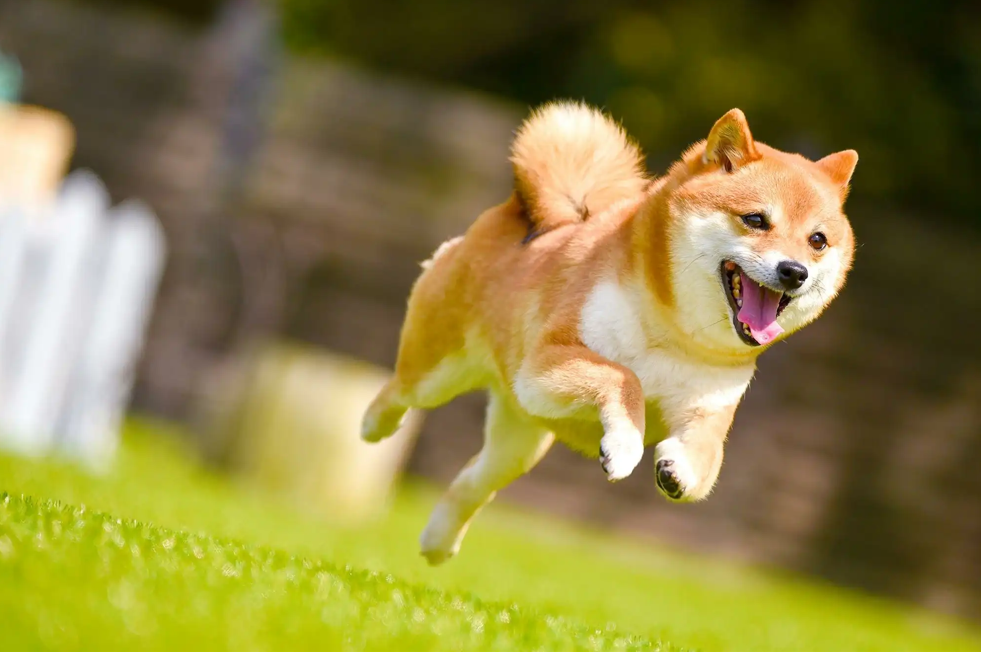

In [ ]:
# I want to see the image here on colab so I'm going to display it
from IPython.display import Image, display

# Define image path
image_path = "/content/drive/MyDrive/Colab Notebooks/DM Lab 2/pics/example1.png"

# Display the image
display(Image(filename=image_path))

In [ ]:
import ollama
response2 = ollama.chat(
    model="llava",
    messages=[
        {
            "role": "user",
            "content": "What is this image about?",
            "images": [r"/content/drive/MyDrive/Colab Notebooks/DM Lab 2/pics/example1.png"]
        }
    ],
)

# Display the output in Markdown format
display(Markdown(response2['message']['content']))

 This image shows a dog, specifically a Shiba Inu, in motion while running through what appears to be an outdoor space, possibly a park. The dog has its tongue out and seems to be enjoying itself as it runs, capturing a moment of playful energy. 

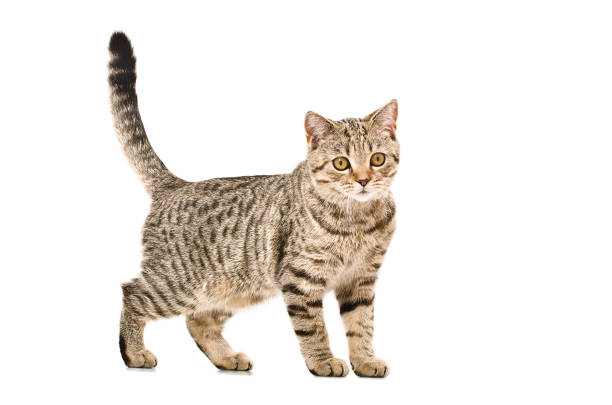

 The image shows a cat. It's a standard tabby with distinctive markings on its fur, including the "M" shape on its forehead, stripes on its body, and what appears to be a large, bushy tail. The cat is posed for the photo with a neutral background, which highlights it without any distractions. 

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/DM Lab 2/pics/example2.jpg"

display(Image(filename=image_path))

response3 = ollama.chat(model='llava', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [r"/content/drive/MyDrive/Colab Notebooks/DM Lab 2/pics/example2.jpg"] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

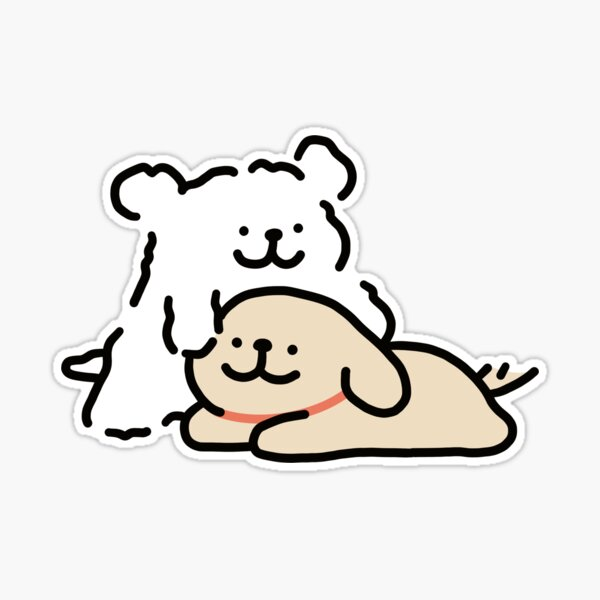

 The image features a cartoon with two characters sitting together. One character appears to be a large, white creature that resembles a bear or a dog of a larger breed, possibly a St Bernard, and the other character seems to be a dog of a smaller breed, like a Pomeranian. They are sitting close to each other in a cozy setting. The characters have human-like features for expression, with the smaller dog looking down at its companion while the larger one looks up, possibly engaged in conversation or simply enjoying each other's company. This image is likely intended to evoke feelings of companionship and affection between pets. 

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/DM Lab 2/pics/example adi.jpg"

display(Image(filename=image_path))

response3 = ollama.chat(model='llava', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [r"/content/drive/MyDrive/Colab Notebooks/DM Lab 2/pics/example adi.jpg"] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

# The description I can say is 90%+ accurate. The part it got wrong was saying the image is of two bears
# but it was able to correctly identify the emotion, which is affection
# When I ran llava on the cat image, it described it incorrectly
# It called the cat bipedal and that the tail was curled

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [ ]:
!pip install -U langchain-community
!pip install chromadb
clear_output()

In [ ]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.1:8b" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.1:8b', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

Based on the provided context, here are some related solutions or areas where IBM is associated with Large Language Models (LLMs):

1. **IBM Watson Natural Language Understanding**: This AI-powered service uses natural language understanding to extract insights from text-based data, which aligns with the capabilities of LLMs.
2. **IBM Cloud**: IBM's cloud platform offers a range of services that can integrate with LLMs, including API integration for easy access to their capabilities.
3. **IBM Research on LLMs**: IBM has been actively researching and developing LLMs, including their application in areas like text generation, language understanding, and accessibility.
4. **IBM Watson Assistant**: This AI-powered conversational platform can integrate with LLMs to provide more advanced language processing capabilities.
5. **IBM's Partnership with LLM Providers**: IBM might have partnerships or collaborations with companies that provide LLM solutions, enabling them to offer these services to their customers.

These areas are not an exhaustive list but indicate some of the ways in which IBM is related to Large Language Models (LLMs).


### **Actual content in the URL:**
![pic11.png](attachment:pic11.png)

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.1:8b"  # You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(urls):
    docs = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs.extend(loader.load())
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
    return vectorstore.as_retriever()

urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.microsoft.com/en-us/ai/large-language-models",
    "https://openai.com/research/gpt"
]
# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Format the retrieved docs for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model=llm_model, messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain for testing
questions = [
    "What are IBM's related solutions with LLMs?",
    "What is Microsoft's approach to using large language models?",
    "How does OpenAI describe the research behind GPT?"
]

# Evaluate each question
results = {}
for question in questions:
    result = rag_chain(question)
    results[question] = result

# Display results
for question, response in results.items():
    print(f"Question: {question}")
    print(f"Response: {response}\n")


Question: What are IBM's related solutions with LLMs?
Response: The text doesn't mention IBM's specific solutions related to Large Language Models (LLMs) directly. However, I can provide some information on IBM's initiatives and products related to LLMs:

IBM has been investing heavily in AI research, including LLMs. Here are a few examples of their related solutions:

1. **Watson**: Watson is IBM's AI platform that includes various capabilities, such as natural language processing (NLP), machine learning, and decision support systems. While not specifically an LLM, Watson can be integrated with LLMs to provide more comprehensive AI solutions.
2. **IBM Cloud Natural Language Understanding** (NLU): This service provides a range of NLP capabilities, including sentiment analysis, entity recognition, and language translation. It can be used in conjunction with LLMs to improve their understanding and generation of human-like text.
3. **IBM Watson Text to Speech**: As mentioned in the provid

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [ ]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.1:8b',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [ ]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,text_tokenized,sentence_vector,sentence_vector_tfidf,embeddings
3394,40567,"From what I know of the man, I have to assume ...",sadness,0.354,"[From, what, I, know, of, the, man, ,, I, have...","[-0.045560006, 0.55974394, 0.6122546, -0.03460...","[-0.010320083, 1.6065488, 1.6856345, 0.1966453...","[-4.254323959350586, -2.6153383255004883, 0.83..."
3298,40471,LORD MAKE ME AN INSTRUMENT OF YOUR PEACE — Whe...,sadness,0.427,"[LORD, MAKE, ME, AN, INSTRUMENT, OF, YOUR, PEA...","[-0.07275282, 0.4035263, 0.38896674, 0.0351164...","[0.0063713063, 0.7620243, 0.83285886, -0.10842...","[-2.2504382133483887, -3.0966498851776123, 0.6..."
1582,20725,"@mdthib This is so lovely! Or I am frightened,...",fear,0.417,"[@, mdthib, This, is, so, lovely, !, Or, I, am...","[-0.20161736, 0.34321526, 0.36253172, 0.183288...","[-0.017493982, 0.9669716, 0.97186756, -0.14871...","[-3.9911746978759766, -0.7896637916564941, 0.6..."
1196,20339,How am I supposed to intimidate the freshman i...,fear,0.604,"[How, am, I, supposed, to, intimidate, the, fr...","[0.073201925, 0.60629517, 0.68234044, 0.134249...","[0.075090475, 1.6000012, 1.8413092, 0.11191398...","[-2.45401668548584, -1.4943732023239136, 1.462..."
2713,30709,@ryanwilson2015 That's why compatibility is ke...,joy,0.250,"[@, ryanwilson2015, That, 's, why, compatibili...","[-0.15283649, 0.49237028, 0.41194168, -0.02576...","[-0.14151101, 1.0738991, 0.96597904, -0.272654...","[-1.5915701389312744, -0.6750012636184692, 0.5..."
...,...,...,...,...,...,...,...,...
2299,30295,Use your smile to change the world. Don't let ...,joy,0.562,"[Use, your, smile, to, change, the, world, ., ...","[-0.09763884, 0.54539925, 0.14530869, 0.662580...","[0.16367315, 1.2751796, 0.79076034, 0.65580994...","[1.5681629180908203, -1.3466309309005737, 1.78..."
2042,30038,Today I reached 1000 subscribers on YT!! #happ...,joy,0.849,"[Today, I, reached, 1000, subscribers, on, YT,...","[-0.23884243, 0.27292687, -0.107834026, 0.6924...","[0.01774594, 0.34248358, -0.04692411, 0.366080...","[-1.6440740823745728, -1.9250859022140503, 2.9..."
1302,20445,@GMModular @goldmedalindia horrible experienc...,fear,0.542,"[@, GMModular, @, goldmedalindia, horrible, ex...","[-0.2350257, 0.3530387, -0.04776242, 0.5225933...","[-0.042174056, 0.8592649, 0.3764922, 0.4507731...","[0.6919191479682922, 0.016745002940297127, 2.8..."
1709,20852,Now ...what to do for the next hour while wait...,fear,0.354,"[Now, ..., what, to, do, for, the, next, hour,...","[-0.079050206, 0.46759552, 0.4234113, 0.397042...","[0.07722334, 1.2732694, 1.4144142, 0.25618476,...","[-2.242826223373413, -0.4773573577404022, 4.50..."


In [ ]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
193,21256,So about 18mths ago i signed up to @Lumo_Energ...,fear,0.271,"[-4.293823719024658, 0.053045473992824554, 1.4..."
64,10921,@MaddenFreestyle i turn the game on wanting to...,anger,0.500,"[-3.8299317359924316, -2.4095094203948975, -0...."
238,30867,"@DocBellsSwan *peers down at you, eyes crinkli...",joy,0.660,"[-3.2145047187805176, -0.6563422083854675, -1...."
109,21172,@TheDappaMc also £2.50 for a chocolate Feast i...,fear,0.438,"[0.31076356768608093, -0.2505471706390381, 1.6..."
119,21182,@BuzzFeed so this houses will get into my inst...,fear,0.700,"[-2.249282121658325, -2.277482748031616, 0.213..."
...,...,...,...,...,...
224,30853,@GameGrumps THANK YOU SO MUCH FOR COMING TO DE...,joy,0.804,"[-1.7266221046447754, -1.9545643329620361, 5.2..."
164,21227,"@chutneysupercat hi lovely brownie, MM is call...",fear,0.440,"[-0.9659637212753296, -0.6541315317153931, 0.3..."
31,10888,The rage has died down.,anger,0.438,"[-1.3892662525177002, -1.9316596984863281, -3...."
222,30851,Heather that was #hilarious! @MsHeatherBates @...,joy,0.812,"[-0.7216570973396301, -1.2775094509124756, -1...."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

4096

In [ ]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.44668587896253603


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.36      0.51      0.42        84
        fear       0.51      0.55      0.53       110
         joy       0.48      0.39      0.43        79
     sadness       0.46      0.28      0.35        74

    accuracy                           0.45       347
   macro avg       0.45      0.43      0.43       347
weighted avg       0.46      0.45      0.44       347



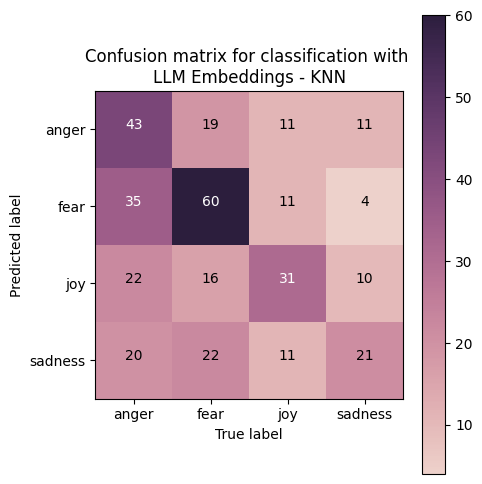

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [ ]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [ ]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [ ]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 4096)

In [ ]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 4096)

In [ ]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [ ]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  4096
output_shape:  4


In [ ]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,628 (1.02 MB)

 Trainable params: 266,628 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.3573 - loss: 1.7208 - val_accuracy: 0.5476 - val_loss: 1.1548
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6051 - loss: 0.9356 - val_accuracy: 0.5620 - val_loss: 1.1126
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6942 - loss: 0.7600 - val_accuracy: 0.5735 - val_loss: 1.1960
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7536 - loss: 0.6062 - val_accuracy: 0.5735 - val_loss: 1.1214
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8082 - loss: 0.5050 - val_accuracy: 0.5965 - val_loss: 1.2017
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8283 - loss: 0.4437 - val_accuracy: 0.6167 - val_loss: 1.2255
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8657 - loss: 0.3519 - val_accuracy: 0.5879 - val_loss: 1.3202
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8844 - loss: 0.3157 - val_accuracy: 

In [ ]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[6.9037437e-01, 3.0410704e-01, 5.3596799e-05, 5.4649888e-03],
       [9.9908936e-01, 1.6133819e-05, 4.6583744e-11, 8.9456030e-04],
       [8.6713082e-04, 2.9422334e-04, 2.1601226e-02, 9.7723740e-01],
       [8.0426341e-01, 1.2507862e-01, 2.5487274e-05, 7.0632495e-02],
       [1.5652315e-05, 9.9633694e-01, 6.1175411e-09, 3.6473328e-03]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'sadness', 'anger', 'fear'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.6


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/logs/training_log_2.csv')
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.428176,1.361577,0.547550,1.154783
1,1,0.610850,0.935164,0.561960,1.112640
2,2,0.701079,0.751114,0.573487,1.196047
3,3,0.745364,0.636366,0.573487,1.121391
4,4,0.794077,0.528637,0.596542,1.201688
5,5,0.831996,0.444533,0.616715,1.225511
6,6,0.848879,0.396703,0.587896,1.320215
7,7,0.880709,0.325910,0.610951,1.402372
8,8,0.905895,0.277263,0.593660,1.574326
9,9,0.894547,0.297630,0.567723,1.619657


In [ ]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.60      0.65      0.62        84
        fear       0.71      0.65      0.68       110
         joy       0.62      0.46      0.53        79
     sadness       0.46      0.59      0.52        74

    accuracy                           0.60       347
   macro avg       0.60      0.59      0.59       347
weighted avg       0.61      0.60      0.60       347



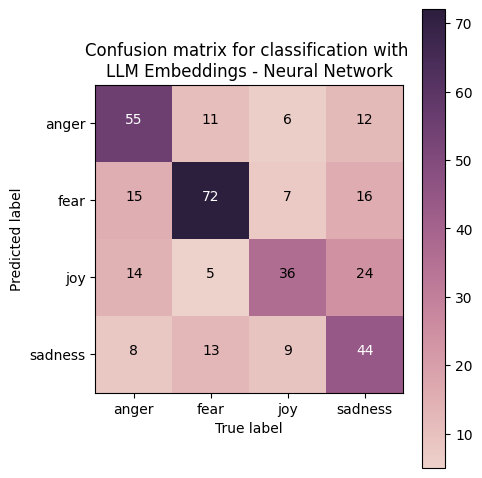

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

In [ ]:
# Answer here


### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [ ]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.1:8b"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: boredness is not one of the given categories. however, based on the text, i would classify it as:

joy. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: excitement doesn't seem to be an option but i'll choose joy. Asking for reclassification.
Invalid response: empowerment. Asking for reclassification.
Invalid response: empowerment. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration doesn't exist, but... 

sadness. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
In

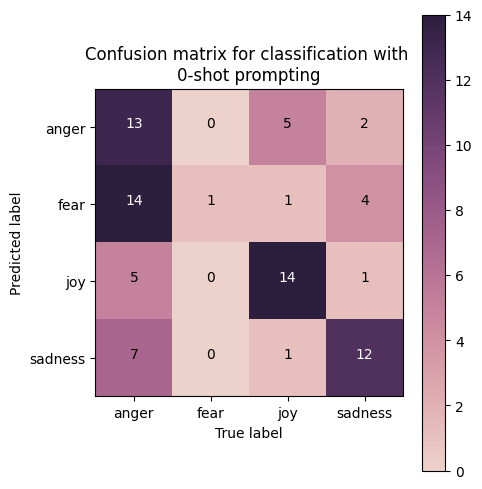

In [ ]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @PuseLepuru it's the irritation of not having found the corpse
Emotion: anger

Text: @Marissa_Frost @NevAmore_MFC awe I love you twooo!!! come adventure with me someday!
Emotion: fear

Text: @AdamCimmering Boro are at the OS before then, they could give the stewards a good work out. Chelsea will get about 8k, will be lively.
Emotion: joy

Text: come to the funeral tomorrow at 12 to mourn the death of my gpa
Emotion: sadness


Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: fr

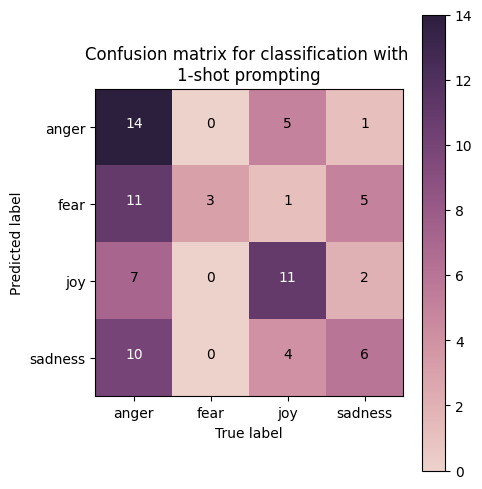

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @PuseLepuru it's the irritation of not having found the corpse
Emotion: anger

Text: @jennylhowe I am angry at the student for being a racist, and the teacher for not stopping it, and at the class for letting it go by.
Emotion: anger

Text: Why does @dapperlaughs have to come to Glasgow on a night I am working. I am fucking gutted, been waiting for an appearance for ages 
Emotion: anger

Text: im on holiday for the next round, fuming!
Emotion: anger

Text: @JrDingy96 Ikr people still got a grudge against him for no reason like wtf?!
Emotion: anger

Text: @Marissa_Frost @NevAmore_MFC awe I love you twooo!!! come adventure w

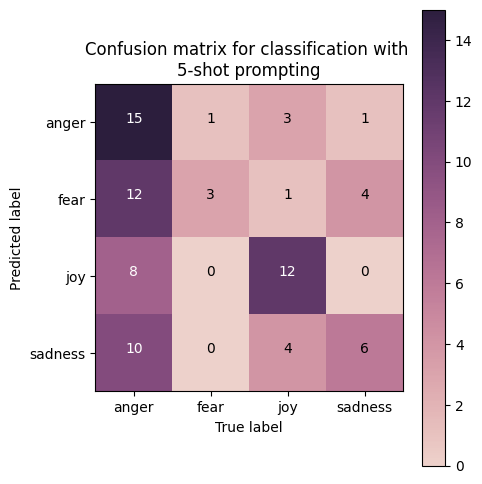

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.


The comparison between zero-shot, 1-shot, and 5-shot prompting for emotion classification highlights the importance of providing examples to improve model performance. Zero-shot prompting, where no task-specific examples are given, had the lowest accuracy and it struggled particularly with emotions like fear. While it showed relatively better performance for joy, the overall results indicated limited understanding of the task. There were also so many reclassifications necessary due to the invalid results.

With 1-shot prompting, the addition of a single example led to a slight improvement. The model performed better at identifying anger and joy but still struggled with fear, showing that one example isn’t enough for the model to generalize effectively.

5-shot prompting delivered the best results, improving accuracy and reducing misclassifications. It also demonstrated a more balanced understanding across all emotions and had less reclassifications.


### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---